In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
nan_values = df.isna()

any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()

for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")

print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)

print("\nMissing Value Counts in Each Column:")
print(missing_value_count)

-----> Column 'in_shazam_charts' has 50 missing values.
-----> Column 'key' has 95 missing values.

Missing Values in the Entire DataFrame?
True

Missing Values in Each Column?
track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
bpm                     False
key                      True
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool

Missing Value Counts in Each Column:
track_name               0
artist(s)_name           0

In [ ]:
len(df)

953

In [ ]:
df = df.dropna(subset=['key'])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            817 non-null    object 
 1   artist(s)_name        817 non-null    object 
 2   artist_count          817 non-null    int64  
 3   released_year         817 non-null    int64  
 4   released_month        817 non-null    int64  
 5   released_day          817 non-null    int64  
 6   in_spotify_playlists  817 non-null    int64  
 7   in_spotify_charts     817 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    817 non-null    int64  
 10  in_apple_charts       817 non-null    int64  
 11  in_deezer_playlists   817 non-null    object 
 12  in_deezer_charts      817 non-null    int64  
 13  in_shazam_charts      817 non-null    object 
 14  bpm                   817 non-null    int64  
 15  key                   817 no

In [ ]:
track_name_to_id = {name: idx for idx, name in enumerate(df['track_name'].unique())}

df['track_id'] = df['track_name'].map(track_name_to_id)
df.drop(columns=['track_name'], inplace=True)
df.head()

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_id
0,"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,...,B,Major,80,89,83,31,0,8,4,0
1,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,...,C#,Major,71,61,74,7,0,10,4,1
2,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,...,F,Major,51,32,53,17,0,31,6,2
3,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,...,A,Major,55,58,72,11,0,11,15,3
4,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,...,A,Minor,65,23,80,14,63,11,6,4


In [ ]:
voi_col = ['track_id', 'streams','bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_voi = df[voi_col]
df_voi.head()

,track_id,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,141381703.0,125,B,Major,80,89,83,31,0,8,4
1,1,133716286.0,92,C#,Major,71,61,74,7,0,10,4
2,2,140003974.0,138,F,Major,51,32,53,17,0,31,6
3,3,800840817.0,170,A,Major,55,58,72,11,0,11,15
4,4,303236322.0,144,A,Minor,65,23,80,14,63,11,6


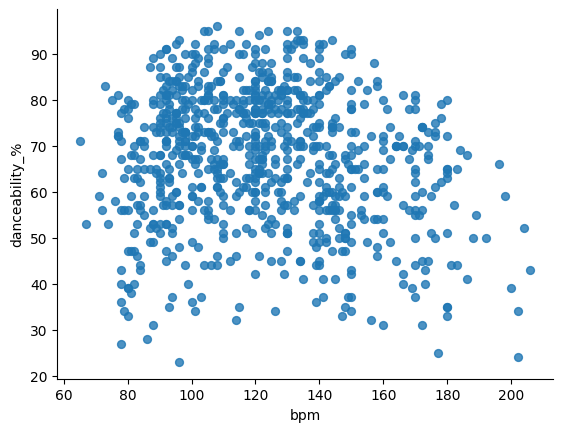

In [ ]:
# @title bpm vs danceability_%

from matplotlib import pyplot as plt
df_voi.plot(kind='scatter', x='bpm', y='danceability_%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

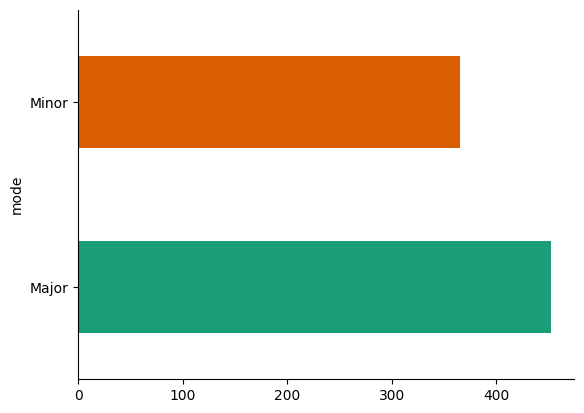

In [ ]:
# @title mode

from matplotlib import pyplot as plt
import seaborn as sns
df_voi.groupby('mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

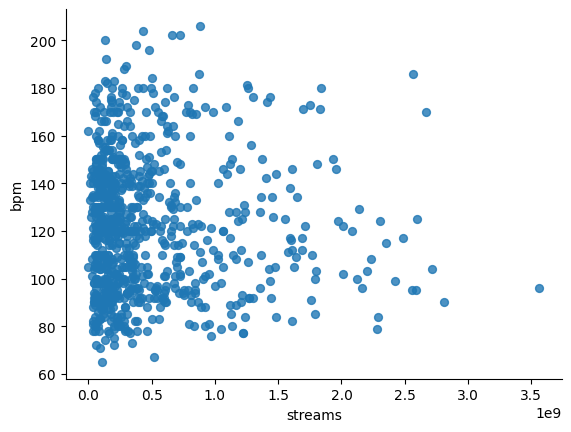

In [ ]:
# @title streams vs bpm

from matplotlib import pyplot as plt
df_voi.plot(kind='scatter', x='streams', y='bpm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#label encoding or one hot encoding?
df_features = df_voi
df_features = pd.get_dummies(df_voi, columns=['key', 'mode'], prefix=['key', 'mode'])
df_features.head()

,track_id,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,141381703.0,125,80,89,83,31,0,8,4,...,False,False,False,False,False,False,False,False,True,False
1,1,133716286.0,92,71,61,74,7,0,10,4,...,True,False,False,False,False,False,False,False,True,False
2,2,140003974.0,138,51,32,53,17,0,31,6,...,False,False,False,False,True,False,False,False,True,False
3,3,800840817.0,170,55,58,72,11,0,11,15,...,False,False,False,False,False,False,False,False,True,False
4,4,303236322.0,144,65,23,80,14,63,11,6,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness'
}

df_features.rename(columns=re_col, inplace=True)
df_features.head()

,track_id,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,141381703.0,125,80,89,83,31,0,8,4,...,False,False,False,False,False,False,False,False,True,False
1,1,133716286.0,92,71,61,74,7,0,10,4,...,True,False,False,False,False,False,False,False,True,False
2,2,140003974.0,138,51,32,53,17,0,31,6,...,False,False,False,False,True,False,False,False,True,False
3,3,800840817.0,170,55,58,72,11,0,11,15,...,False,False,False,False,False,False,False,False,True,False
4,4,303236322.0,144,65,23,80,14,63,11,6,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_da = df_features.drop(columns=['track_id'])
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,141381703.0,125,80,89,83,31,0,8,4,False,...,False,False,False,False,False,False,False,False,True,False
1,133716286.0,92,71,61,74,7,0,10,4,False,...,True,False,False,False,False,False,False,False,True,False
2,140003974.0,138,51,32,53,17,0,31,6,False,...,False,False,False,False,True,False,False,False,True,False
3,800840817.0,170,55,58,72,11,0,11,15,True,...,False,False,False,False,False,False,False,False,True,False
4,303236322.0,144,65,23,80,14,63,11,6,True,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
binary_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

for column in binary_columns:
    df_da[column] = df_da[column].astype(int)
print(df_da.head())

       streams  bpm  danceability  valence  energy  acousticness  \
0  141381703.0  125            80       89      83            31   
1  133716286.0   92            71       61      74             7   
2  140003974.0  138            51       32      53            17   
3  800840817.0  170            55       58      72            11   
4  303236322.0  144            65       23      80            14   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0                 0         8            4      0  ...       0      0       0   
1                 0        10            4      0  ...       1      0       0   
2                 0        31            6      0  ...       0      0       0   
3                 0        11           15      1  ...       0      0       0   
4                63        11            6      1  ...       0      0       0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0      0      0       0      0       0 

In [ ]:
scaler = MinMaxScaler()

df_da['streams'] = scaler.fit_transform(df_da[['streams']])
print(df_da.head())

    streams  bpm  danceability  valence  energy  acousticness  \
0  0.039685  125            80       89      83            31   
1  0.037533   92            71       61      74             7   
2  0.039298  138            51       32      53            17   
3  0.224794  170            55       58      72            11   
4  0.085117  144            65       23      80            14   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0                 0         8            4      0  ...       0      0       0   
1                 0        10            4      0  ...       1      0       0   
2                 0        31            6      0  ...       0      0       0   
3                 0        11           15      1  ...       0      0       0   
4                63        11            6      1  ...       0      0       0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0      0      0       0      0       0           1       

In [ ]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()
print(correlation_matrix)

                       bpm  danceability   valence    energy  acousticness  \
bpm               1.000000     -0.148174  0.029169  0.013363     -0.010767   
danceability     -0.148174      1.000000  0.389729  0.157970     -0.240454   
valence           0.029169      0.389729  1.000000  0.349736     -0.064072   
energy            0.013363      0.157970  0.349736  1.000000     -0.552637   
acousticness     -0.010767     -0.240454 -0.064072 -0.552637      1.000000   
instrumentalness -0.003407     -0.102144 -0.147032 -0.051662      0.046700   
liveness         -0.005817     -0.100579  0.000142  0.111240     -0.046112   
speechiness       0.038248      0.201189  0.035704 -0.026880     -0.017820   
streams          -0.025694     -0.093268 -0.051014 -0.036499     -0.005751   

                  instrumentalness  liveness  speechiness   streams  
bpm                      -0.003407 -0.005817     0.038248 -0.025694  
danceability             -0.102144 -0.100579     0.201189 -0.093268  
valence  

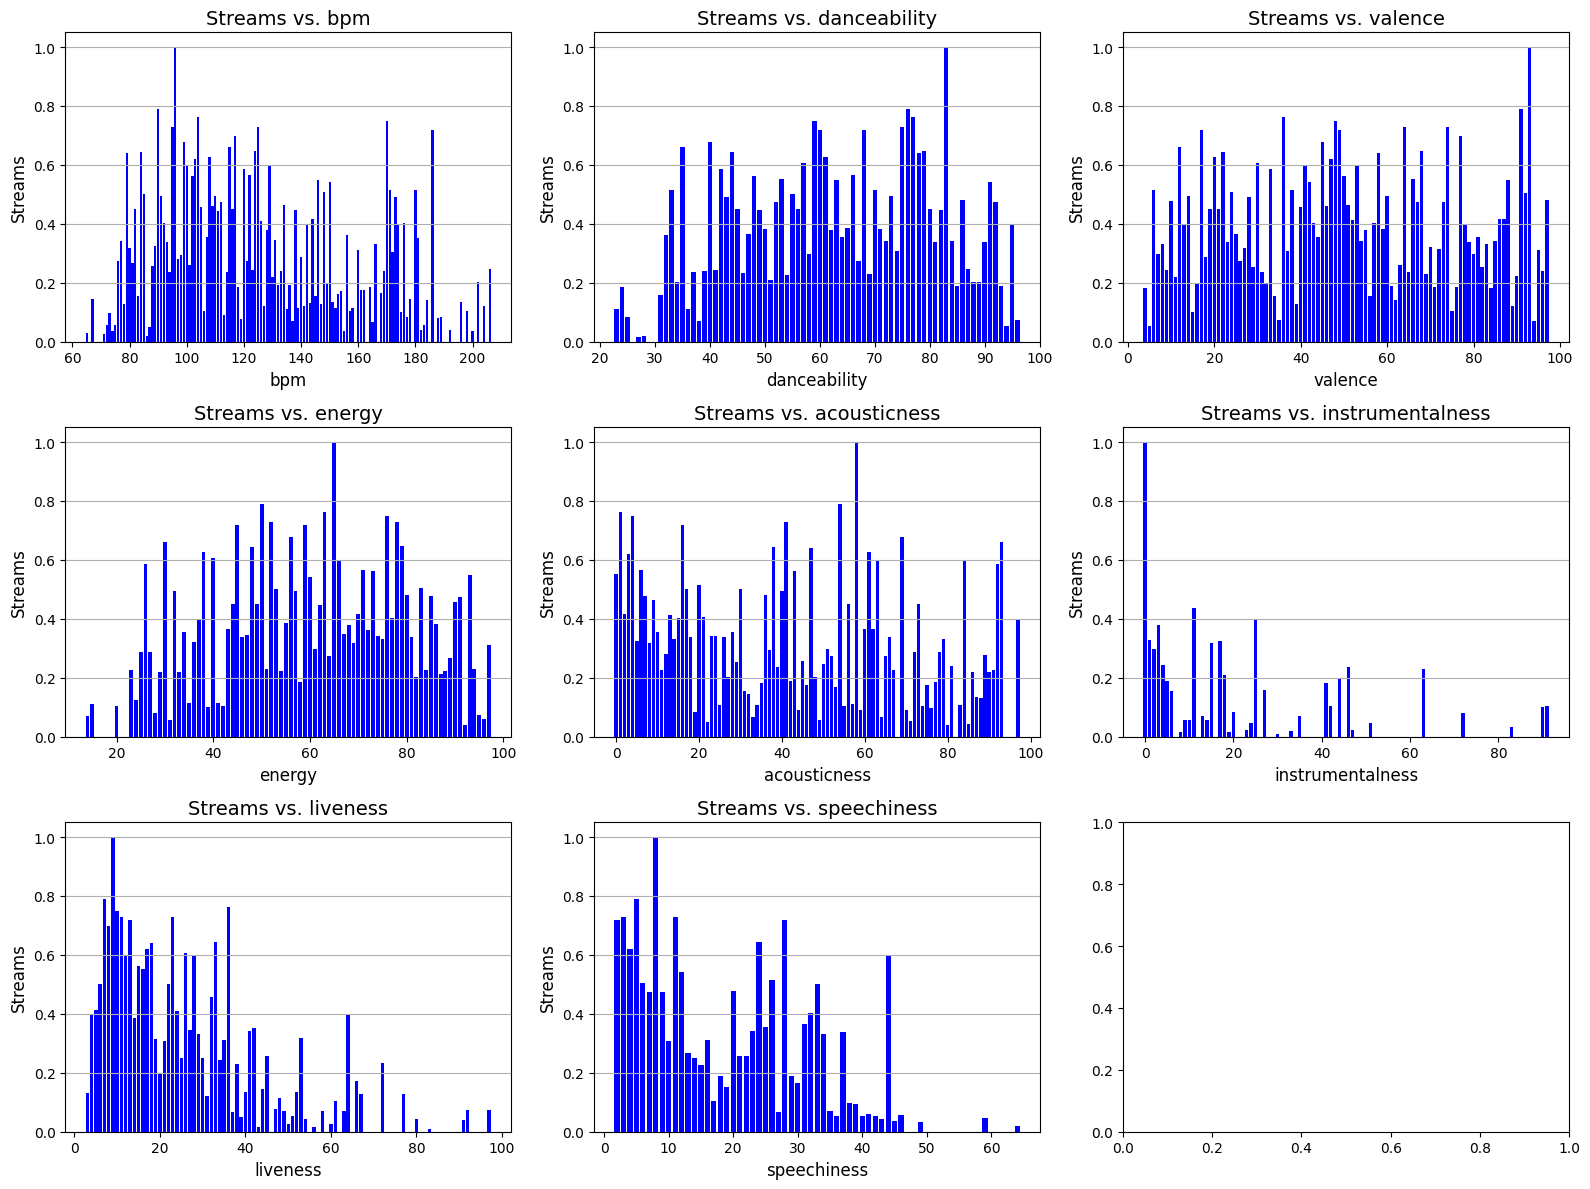

In [ ]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df_da[column], df_da['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-29-f60c1d0b6d84>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')


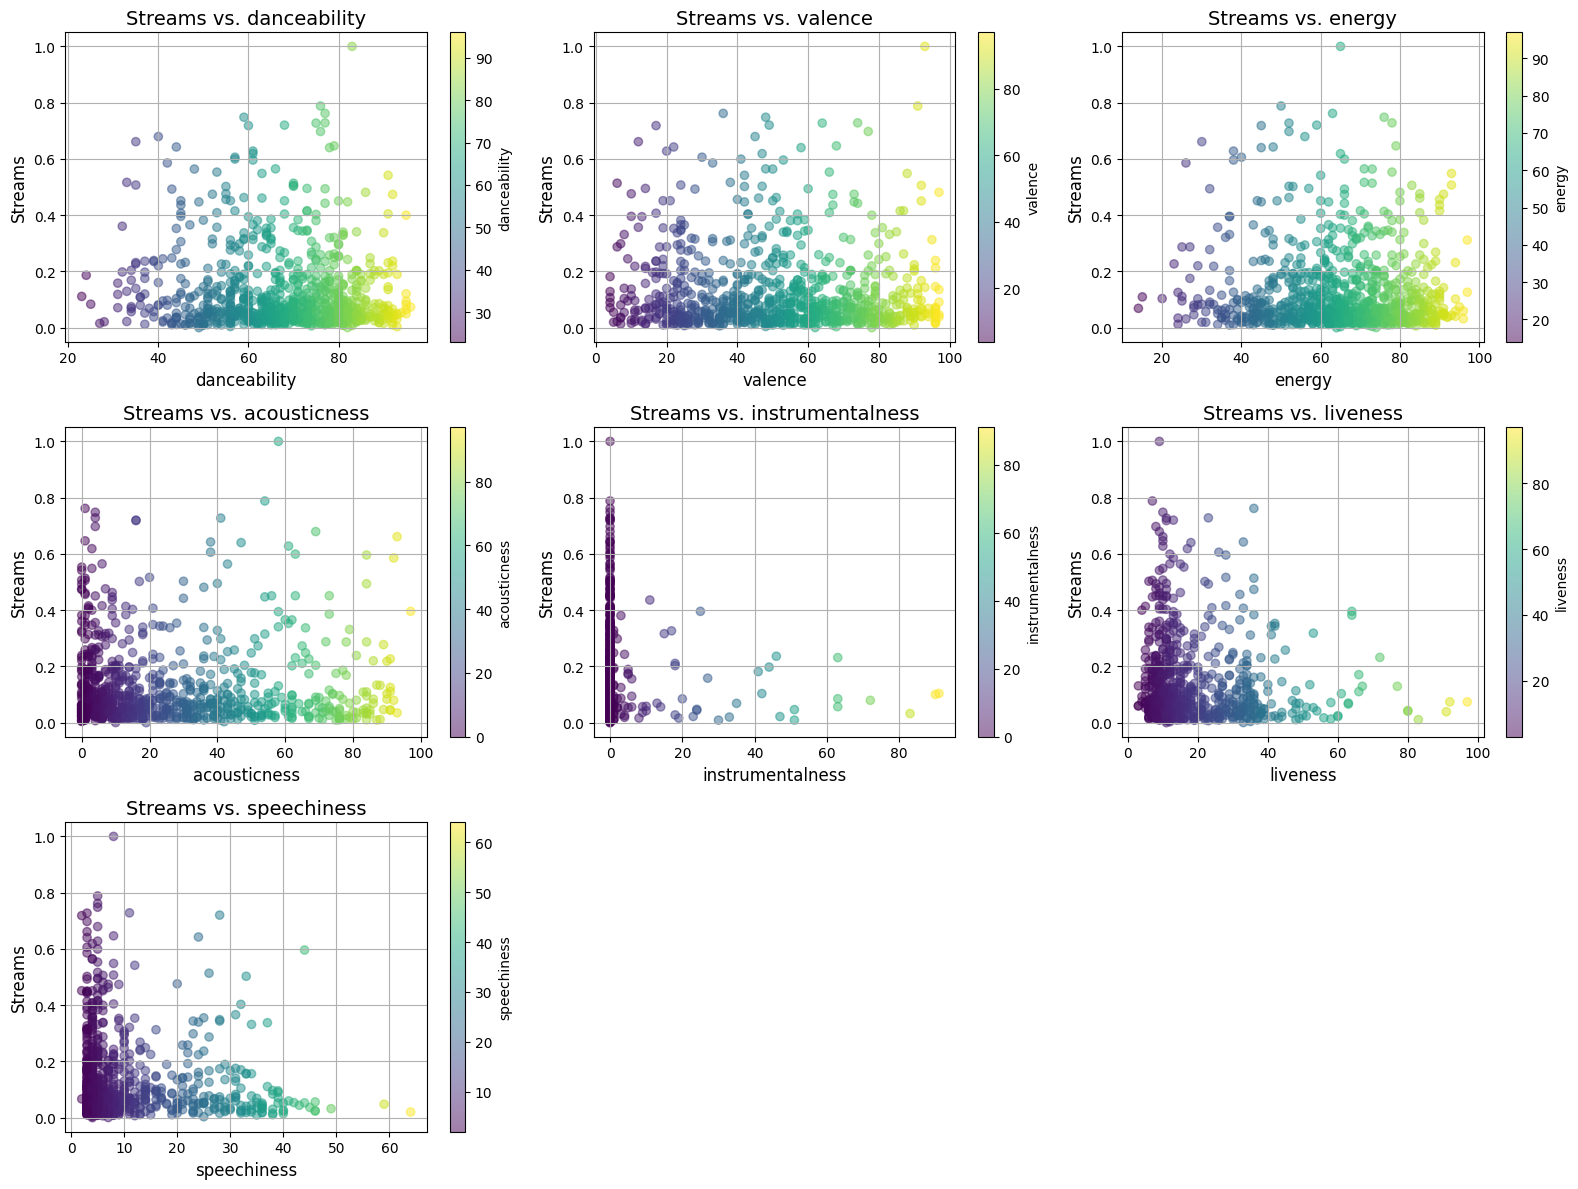

In [ ]:
columns_to_plot = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da[column], df_da['streams'], c=df_da[column], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df_da = df_da.merge(df[['key']], left_index=True, right_index=True, how='inner')
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key
0,0.039685,125,80,89,83,31,0,8,4,0,...,0,0,0,0,0,0,0,1,0,B
1,0.037533,92,71,61,74,7,0,10,4,0,...,0,0,0,0,0,0,0,1,0,C#
2,0.039298,138,51,32,53,17,0,31,6,0,...,0,0,0,1,0,0,0,1,0,F
3,0.224794,170,55,58,72,11,0,11,15,1,...,0,0,0,0,0,0,0,1,0,A
4,0.085117,144,65,23,80,14,63,11,6,1,...,0,0,0,0,0,0,0,0,1,A


<ipython-input-31-b02d0b801f76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="key", data=df_da, palette="Set2")


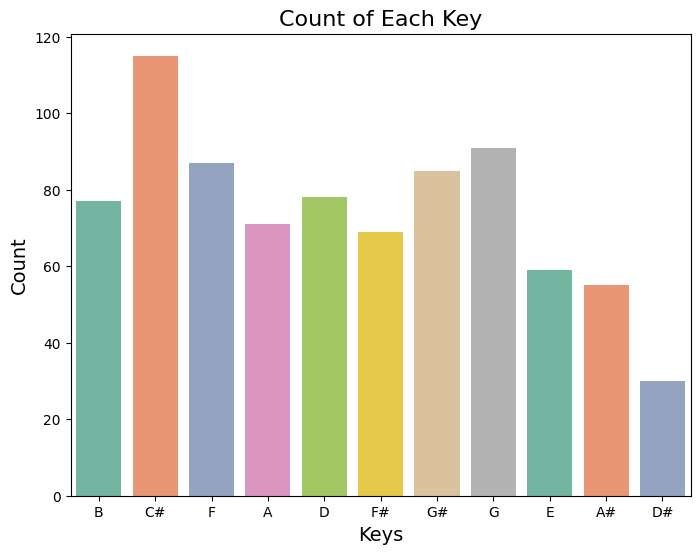

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="key", data=df_da, palette="Set2")
plt.xlabel("Keys", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Each Key", fontsize=16)
plt.show()

In [ ]:
key_counts = df_da['key'].value_counts().reset_index()
key_counts.columns = ['Key', 'Count']

total_count_key = key_counts['Count'].sum()
total_row = pd.DataFrame({'Key': ['Total'], 'Count': [total_count_key]})
key_counts = pd.concat([key_counts, total_row])

#------------------------

total_counts = df_da['key'].count()

is_equal = total_counts == key_counts[key_counts['Key'] == 'Total']['Count'].values[0]
print("Is total_count equal to 'Total'Key? ", is_equal)

print("Total count of values in the 'key' column:", total_counts)
print(key_counts)

Is total_count equal to 'Total'Key?  True
Total count of values in the 'key' column: 817
      Key  Count
0      C#    115
1       G     91
2       F     87
3      G#     85
4       D     78
5       B     77
6       A     71
7      F#     69
8       E     59
9      A#     55
10     D#     30
0   Total    817


In [ ]:
key_counts = key_counts[key_counts['Key'] != 'Total']


In [ ]:
df_da.columns = df_da.columns.str.lower()
key_counts.columns = key_counts.columns.str.lower()

In [ ]:
merged_df = key_counts.merge(df_da, on='key')
result_df = merged_df.groupby('key')['streams'].agg(['mean', 'min', 'max']).reset_index()
result_df = result_df.rename(columns={'mean': 'avg_streams', 'min': 'min_streams', 'max': 'max_streams'})

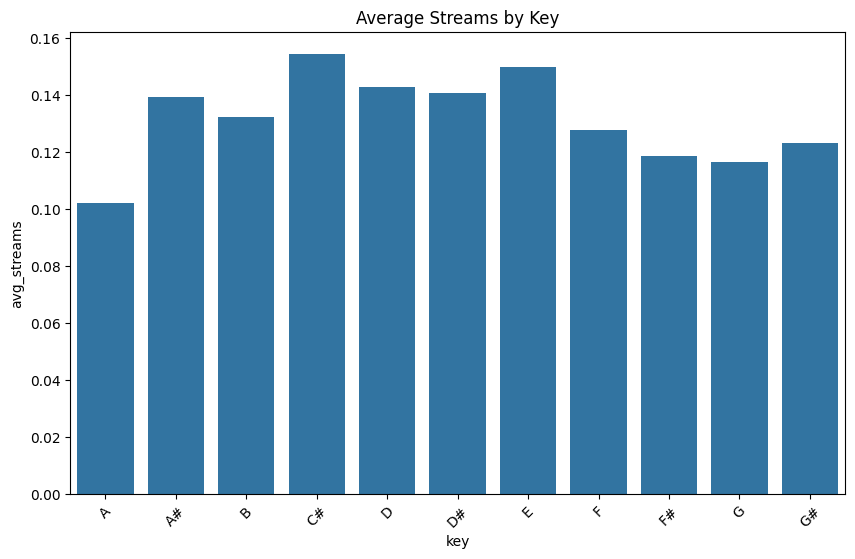

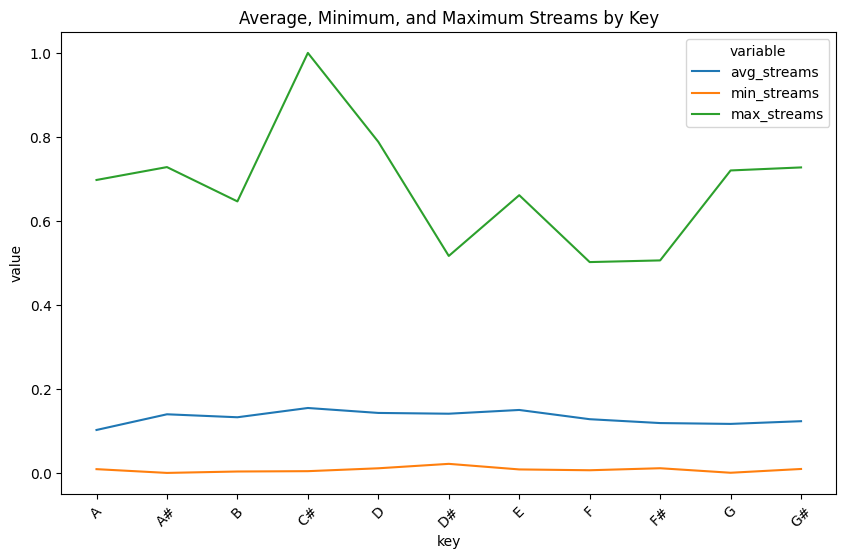

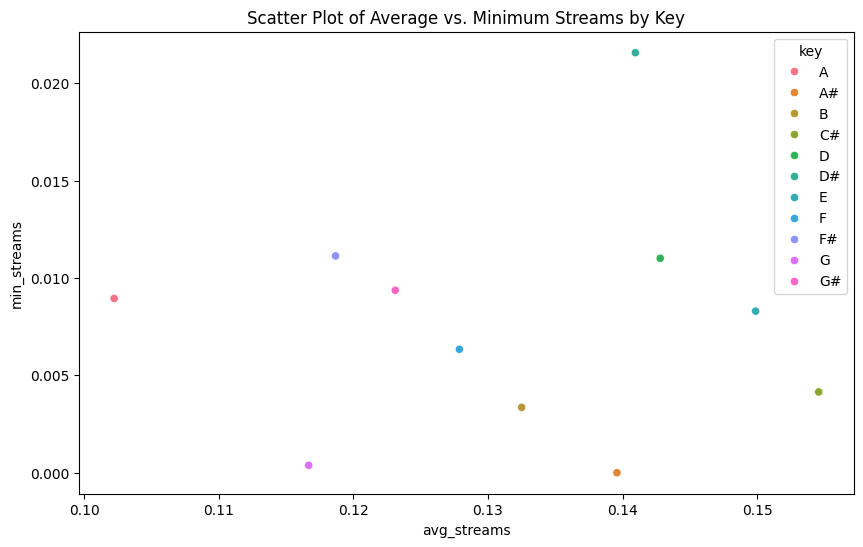

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='key', y='avg_streams', data=result_df)
plt.title('Average Streams by Key')
plt.xticks(rotation=45)
plt.show()

# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='key', y='value', hue='variable', data=pd.melt(result_df, id_vars='key'))
plt.title('Average, Minimum, and Maximum Streams by Key')
plt.xticks(rotation=45)
plt.show()

# Scat Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_streams', y='min_streams', hue='key', data=result_df)
plt.title('Scatter Plot of Average vs. Minimum Streams by Key')
plt.show()

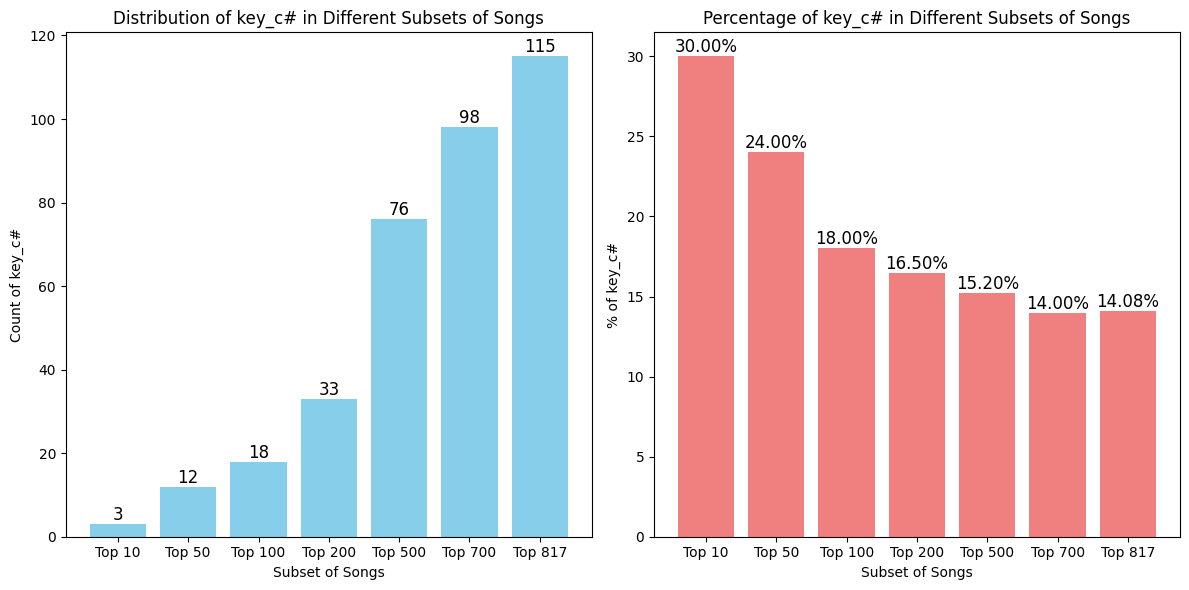

In [ ]:
key_counts = []
key_percentages = []
top_10_songs = df_da.nlargest(10, 'streams')
top_50_songs = df_da.nlargest(50, 'streams')
top_100_songs = df_da.nlargest(100, 'streams')
top_200_songs = df_da.nlargest(200, 'streams')
top_500_songs = df_da.nlargest(500, 'streams')
top_700_songs = df_da.nlargest(700, 'streams')
top_817_songs = df_da.nlargest(817, 'streams')
last_10_songs = df_da.nsmallest(10, 'streams')
last_50_songs = df_da.nsmallest(50, 'streams')
last_100_songs = df_da.nsmallest(100, 'streams')
last_200_songs = df_da.nsmallest(200, 'streams')
last_500_songs = df_da.nsmallest(500, 'streams')
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']
key_of_interest = 'key_c#'

for df in dataframes:
    key_count = df[key_of_interest].eq(1).sum()
    key_counts.append(key_count)
    key_percentage = (key_count / len(df)) * 100
    key_percentages.append(key_percentage)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(labels, key_counts, color='skyblue')
plt.xlabel('Subset of Songs')
plt.ylabel(f'Count of {key_of_interest}')
plt.title(f'Distribution of {key_of_interest} in Different Subsets of Songs')

for i, count in enumerate(key_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.subplot(122)
plt.bar(labels, key_percentages, color='lightcoral')
plt.xlabel('Subset of Songs')
plt.ylabel(f'% of {key_of_interest}')
plt.title(f'Percentage of {key_of_interest} in Different Subsets of Songs')

for i, percentage in enumerate(key_percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

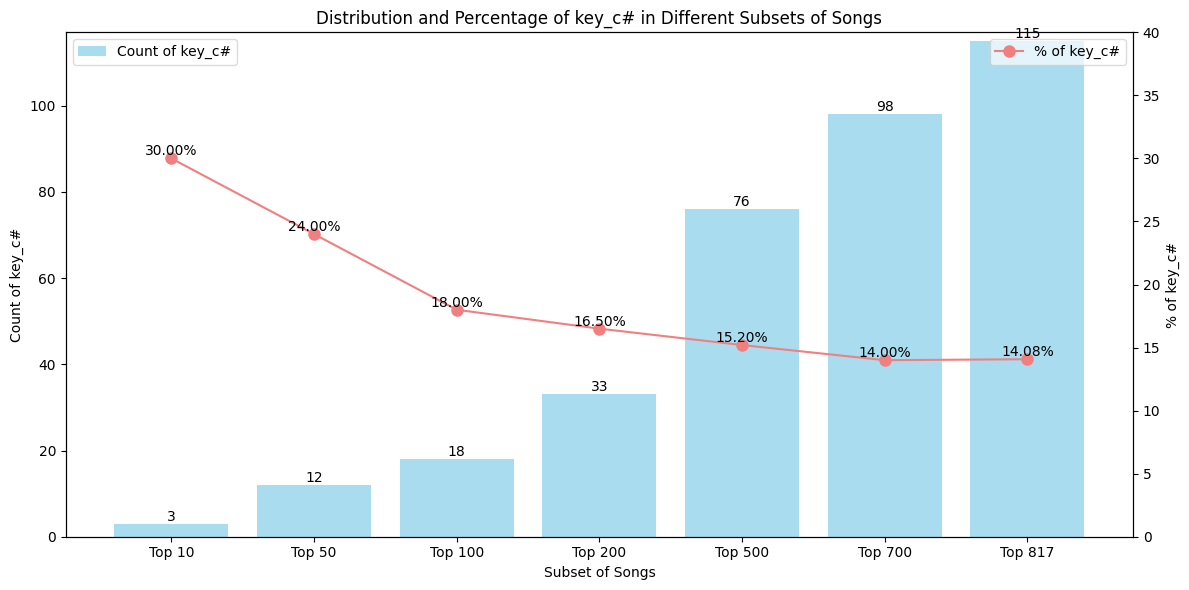

In [ ]:
key_counts = []
key_percentages = []



for df in dataframes:
    key_count = df[key_of_interest].eq(1).sum()
    key_counts.append(key_count)
    key_percentage = (key_count / len(df)) * 100
    key_percentages.append(key_percentage)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(labels, key_counts, color='skyblue', alpha=0.7, label=f'Count of {key_of_interest}')
ax1.set_xlabel('Subset of Songs')
ax1.set_ylabel(f'Count of {key_of_interest}')
ax1.set_title(f'Distribution and Percentage of {key_of_interest} in Different Subsets of Songs')
ax1.set_ylim(0, max(key_counts) + 2)
#----
ax2 = ax1.twinx()
ax2.plot(labels, key_percentages, marker='o', color='lightcoral', linestyle='-', markersize=8, label=f'% of {key_of_interest}')
ax2.set_ylabel(f'% of {key_of_interest}')
ax2.set_ylim(0, max(key_percentages) + 10)

for i, percentage in enumerate(key_percentages):
    ax2.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)
#---
for i, count in enumerate(key_counts):
    ax1.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

ax1.legend(loc='upper left', framealpha=0.7)
#---
ax2.legend(loc='upper right', framealpha=0.7)

plt.tight_layout()
plt.show()

While one might be tempted to get ride of #Keys, it appears that this is a big variable of interest.¶
C# appearances:

Top 10: 30%
Top 50: 24%
Top 100: 18%